# Lab Session 8 - Coursework Assignment 
# Name: Robert Onuma
# ID: K23050945

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [1856]:
prices = pd.read_csv("/Users/robertwillfindyou/Downloads/sap100.csv")

In [1857]:
prices.dropna(axis=1, inplace=True)
prices.dropna(axis=0, inplace=True)
prices

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,2023-07-07 00:00:00,190.679993,35.900002,29.100000,42.770000,153.490005,103.160004,106.349998,485.269989,58.200001,...,138.970001,274.429993,173.699997,461.579987,202.820007,179.759995,33.540001,236.449997,135.500000,305.760010
1784,2023-07-10 00:00:00,188.610001,35.139999,29.790001,42.320000,154.880005,104.690002,107.019997,496.350006,58.080002,...,138.339996,269.609985,179.440002,463.049988,204.860001,181.330002,33.740002,238.160004,134.490005,308.450012
1785,2023-07-11 00:00:00,188.080002,34.990002,30.570000,42.740002,154.649994,105.970001,107.500000,504.739990,58.750000,...,140.020004,269.790009,178.820007,462.890015,206.789993,185.240005,34.919998,240.550003,135.570007,309.720001
1786,2023-07-12 00:00:00,189.770004,34.860001,30.320000,43.259998,155.039993,106.489998,106.849998,507.359985,58.650002,...,140.889999,271.989990,182.369995,451.700012,208.919998,186.490005,35.110001,242.210007,134.979996,313.880005


## Exercise 1

<Axes: xlabel='Date'>

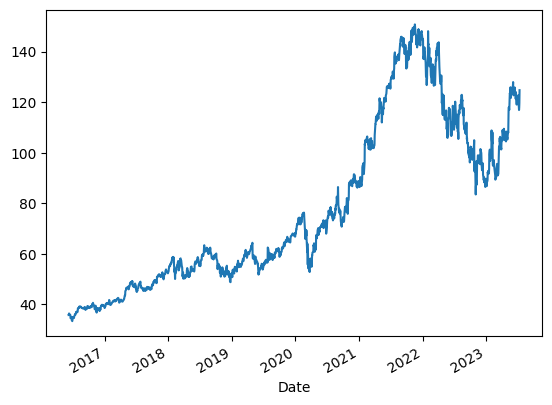

In [1858]:
prices.set_index(pd.to_datetime(prices['Date']), inplace=True)
goog_daily_prices = prices['GOOG']
goog_daily_prices.plot()

In [1859]:
def find_log_returns(prices_df: pd.DataFrame) -> pd.Series:
    returns = np.diff(np.log(prices_df))
    returns_series = pd.Series(returns, index=prices_df.index[1:])

    return returns_series

In [1860]:
goog_monthly_prices = goog_daily_prices.resample('M').last()
goog_annual_prices =goog_daily_prices.resample('Y').last()


/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/1108720143.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goog_monthly_prices = goog_daily_prices.resample('M').last()
/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/1108720143.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  goog_annual_prices =goog_daily_prices.resample('Y').last()


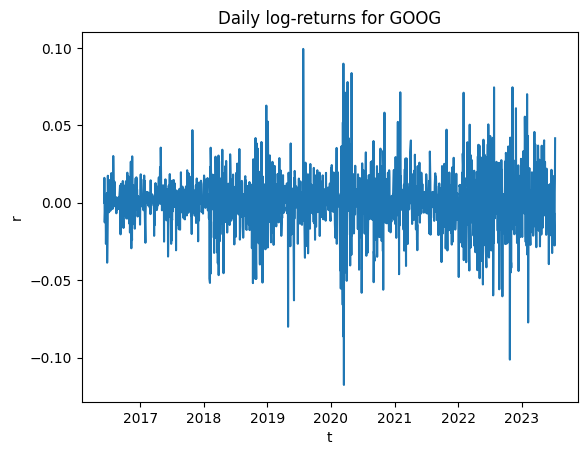

In [1861]:
daily_rets_series = find_log_returns(goog_daily_prices)
plt.plot(daily_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Daily log-returns for GOOG')
plt.show()

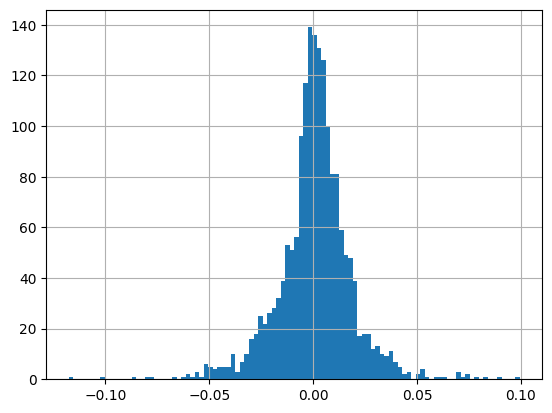

In [1862]:
daily_rets_series.hist(bins=100)
plt.show()

<Axes: >

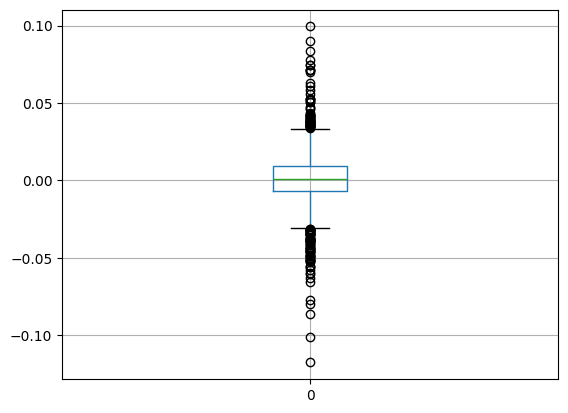

In [1863]:
pd.DataFrame(daily_rets_series).boxplot()

In [1864]:
(test_statistic, p_value) = scipy.stats.jarque_bera(daily_rets_series, nan_policy='raise')
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" %p_value)


JB test statistic = 1511.782576
p_value = 0.000000


In [1865]:
print(scipy.stats.skew(daily_rets_series))
print(scipy.stats.kurtosis(daily_rets_series))

-0.20209301292872753
4.487802668103253


In [1866]:
(test_statistic, p_value) = scipy.stats.shapiro(daily_rets_series, nan_policy='raise')
print("Shapiro-Wilk test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

Shapiro-Wilk test statistic = 0.940852
p_value = 0.000000


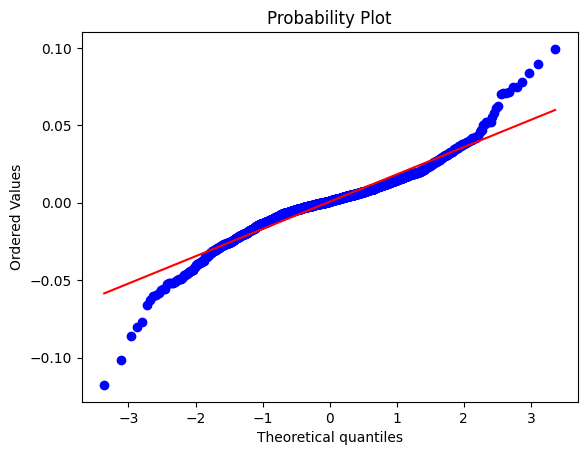

In [1867]:
scipy.stats.probplot(daily_rets_series, dist="norm", plot=plt)
plt.show()

The daily log returns of GOOG has strong evidence to suggest that it is a dataset that is not normally distributed. Even though the histogram almost resembles a bell-shaped curve, the p-value of the JB test is significantly less than 0.05 meaning that we can reject the Null hypothesis (that the skewness is 0 and the kurtosis is 3) at a 95% confidence. To further analyse this, we see that the skewness of the daily returns is almost -0.2 and the kurtosis is almost 4.5, suggesting that the dataset is skewed to the left and that the distribution is peaked upwards. This can further be verified by the heavy-tailed skewness of the probability plot.

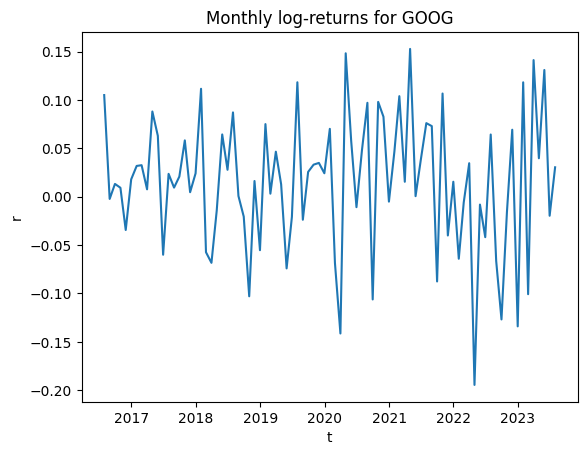

In [1868]:
monthly_rets_series = find_log_returns(goog_monthly_prices)
plt.plot(monthly_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Monthly log-returns for GOOG')
plt.show()

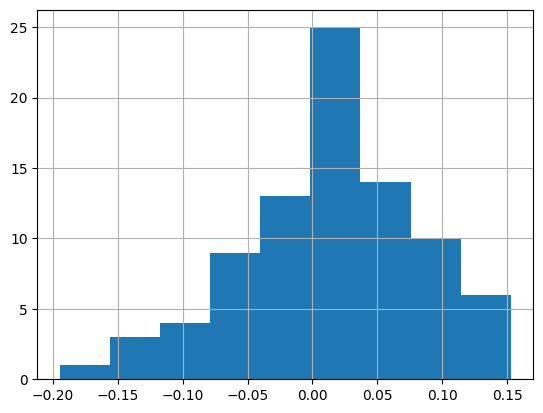

In [1869]:
monthly_rets_series.hist(bins=9)
plt.show()

<Axes: >

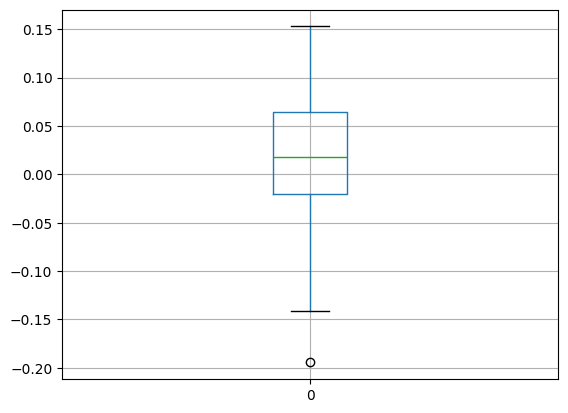

In [1870]:
pd.DataFrame(monthly_rets_series).boxplot()

In [1871]:
print(scipy.stats.skew(monthly_rets_series))
print(scipy.stats.kurtosis(monthly_rets_series))

-0.42559827827316027
0.1132803748841682


In [1872]:
(test_statistic, p_value) = scipy.stats.jarque_bera(monthly_rets_series, nan_policy='raise')
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

JB test statistic = 2.611512
p_value = 0.270968


In [1873]:
len(monthly_rets_series)

85

In [1874]:
(test_statistic, p_value) = scipy.stats.shapiro(monthly_rets_series, nan_policy='raise')
print("Shapiro-Wilk test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

Shapiro-Wilk test statistic = 0.982688
p_value = 0.312439


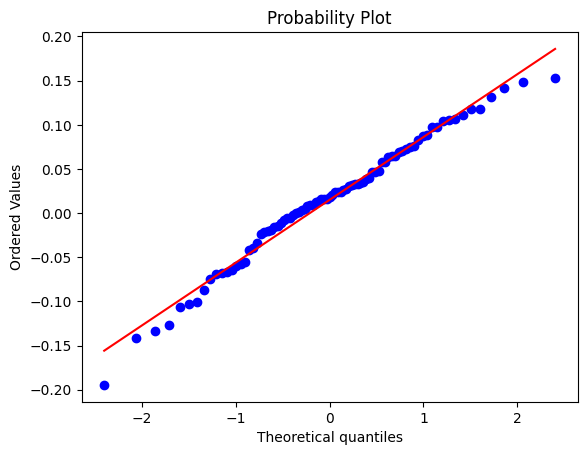

In [1875]:
scipy.stats.probplot(monthly_rets_series, dist="norm", plot=plt)
plt.show()

The monthly log returns of GOOG has evidence to suggest that it is a dataset that is normally distributed. We see that from the p-values gotten from both the JB test and the Shapiro-Wilk test are greater than 0.05, indicating that we can accept the Null hypothesis (that the skewness is 0 and the kurtosis is 0 or 3) at a 95% confidence. Also, the probability curve doesn't show a strong deviation from normality.

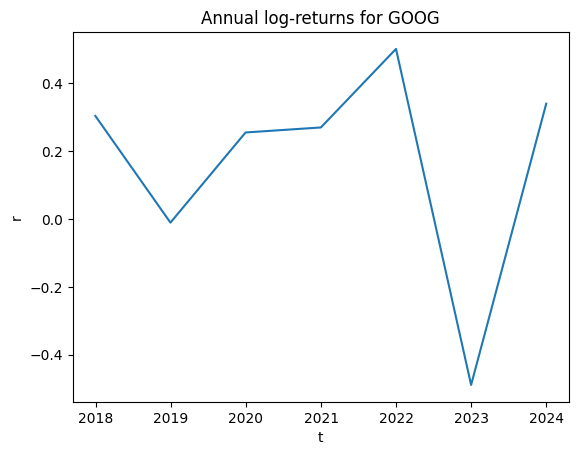

In [1876]:
annual_rets_series = find_log_returns(goog_annual_prices)
plt.plot(annual_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Annual log-returns for GOOG')
plt.show()

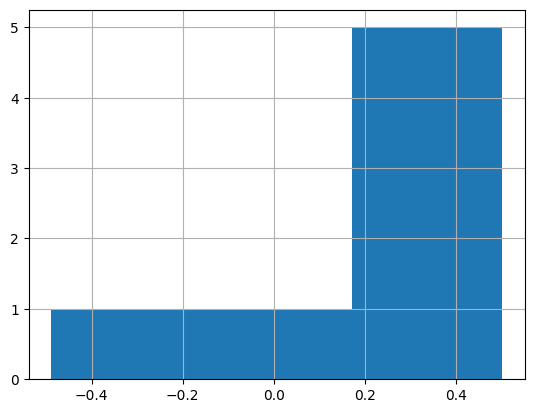

In [1877]:
annual_rets_series.hist(bins=3)
plt.show()

In [1878]:
print(scipy.stats.skew(annual_rets_series))
print(scipy.stats.kurtosis(annual_rets_series))

-1.2456894305955362
0.4160324862329423


In [1879]:
(test_statistic, p_value) = scipy.stats.jarque_bera(annual_rets_series)
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

JB test statistic = 1.860848
p_value = 0.394386


In [1880]:
len(annual_rets_series)

7

In [1881]:
(test_statistic, p_value) = scipy.stats.shapiro(annual_rets_series, nan_policy='raise')
print("Shapiro-Wilk test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

Shapiro-Wilk test statistic = 0.832277
p_value = 0.084088


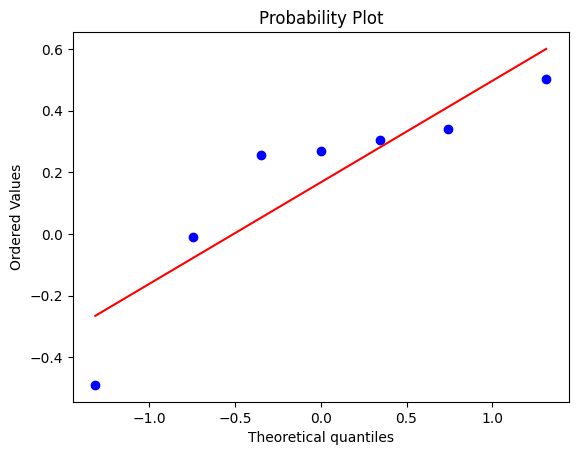

In [1882]:
scipy.stats.probplot(annual_rets_series, dist="norm", plot=plt)
plt.show()

The annual log returns of GOOG has some evidence to suggest that it is a dataset that is normally distributed, although it is not conclusive as the sample size is quite small (a sample size of 7). Even though the histogram does not show a bell-shapped curve, this could be due to the low sample size, not accurately showing this on the histogram. However, we see that from the p-values gotten from both the JB test and the Shapiro-Wilk test are greater than 0.05, indicating that we can accept the Null hypothesis (that the skewness is 0 and the kurtosis is 0 or 3) at a 95% confidence. Also, the probability curve doesn't show a strong deviation from normality.

## Exercise 2

/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/2383211923.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame({'Stock': stock, 'Frequency': freq, 'Test Statistic': test_statistic, 'p-value': p_value}, index=[0])], axis=0)
/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/2383211923.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_data = prices[stock].resample(freq).last()
/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/2383211923.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  prices_data = prices[stock].resample(fr

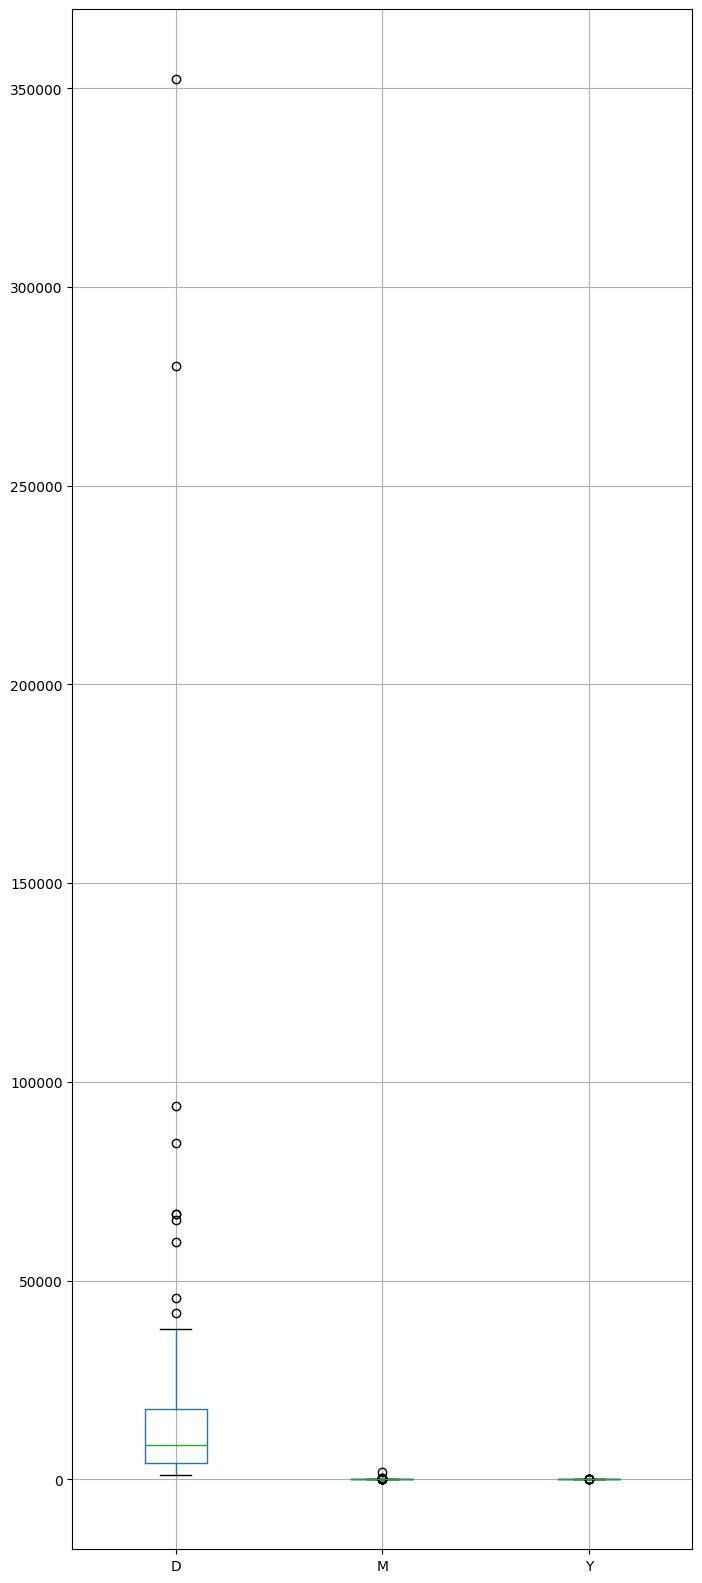

In [1883]:
freq_table = ['D', 'M', 'Y']
#First instantiate the dataframe containing the values that are needed for the boxplot and further analysis (aka the raw dataset)
comparison_df = pd.DataFrame(columns=['Stock', 'Frequency', 'Test Statistic', 'p-value'])

#Then iterate through each stock (with the exclusion of the first as it is the index, not a stock)
for stock in prices.columns:
    #Break from the for loop and continue to the next index after the 'Date' column is stumbled upon (which is the first column)
    if stock == 'Date':
        continue
    #Iterate through each frequency as well to get the log returns at each frequency
    for freq in freq_table:
        #To possibly avoid any errors with resampling a dataset that is already in the day format, just continue with that same format, and resample if another frequency
        if freq == 'D':
            prices_data = prices[stock]
        else:
            prices_data = prices[stock].resample(freq).last()

        returns = np.diff(np.log(prices_data))
        returns_series = pd.Series(returns, index=prices_data.index[1:])
        (test_statistic, p_value) = scipy.stats.jarque_bera(returns_series)

        #Add the results to the dataset
        comparison_df = pd.concat([comparison_df, pd.DataFrame({'Stock': stock, 'Frequency': freq, 'Test Statistic': test_statistic, 'p-value': p_value}, index=[0])], axis=0)

#Create a pivot table from the raw data set, where row index is set to the stocks, columns are set to the frequencym and the values are the test statistic values
comparison_df_pivot_table = comparison_df.pivot(index='Stock', columns='Frequency', values='Test Statistic')

plt.figure(figsize=(8, 20))
comparison_df_pivot_table.boxplot()
plt.show()


        

The result shows a significant decrease from daily to monthly frequencies, indicating that there was a jump from test statistics that could posssibly reach as high as almost 100000 (indicating a very high deviation from normality) to a test statistic that is relatively closer to 0 across the board (indicating low deviations from normality). However, we can't properly see the difference between the monthly and the dailt distributions, although I would recon that there was an increase in normality as the distribution (+ outliers) in the daily distribution is closer to 0 than that of the monthly distribution of the test statistic. Therefore, this overall supports the claim that the stock returns exhibit aggregational Gaussianity. This can further be verified when the p-value boxplots of the different frequencies are shown, showing a clearly increasing distribution above 0, indicating a greater likelyhood of acceptance of gaussanity when changing from daily to monthly to yearly.

## Exercise 3

In [1884]:

import datetime
from pandas_datareader import data
import yfinance as yfin
yfin.pdr_override()
start = datetime.datetime(2016, 6, 6)
end = datetime.datetime(2023, 7, 14)
SP_100_index = data.get_data_yahoo("^OEX", start, end)
SP_100_index.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-06,928.179993,933.960022,928.179993,931.900024,931.900024,3442020000
2016-06-07,932.070007,935.739990,932.070007,932.229980,932.229980,3534730000
2016-06-08,932.450012,935.890015,932.450012,935.270020,935.270020,3562060000
2016-06-09,933.849976,934.619995,930.059998,933.580017,933.580017,3290320000
2016-06-10,931.559998,931.559998,924.039978,926.750000,926.750000,3515010000


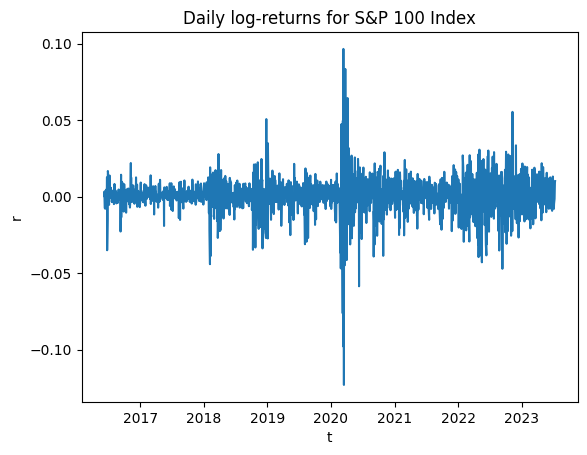

In [1885]:
daily_SP_100_prices = SP_100_index['Adj Close']
daily_SP_rets_series = find_log_returns(daily_SP_100_prices)
plt.plot(daily_SP_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Daily log-returns for S&P 100 Index')
plt.show()

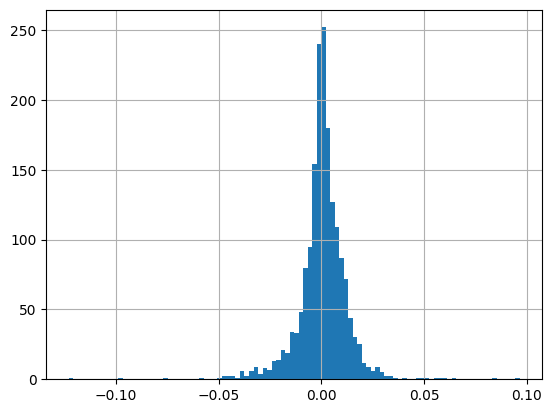

In [1886]:
daily_SP_rets_series.hist(bins=100)
plt.show()

<Axes: >

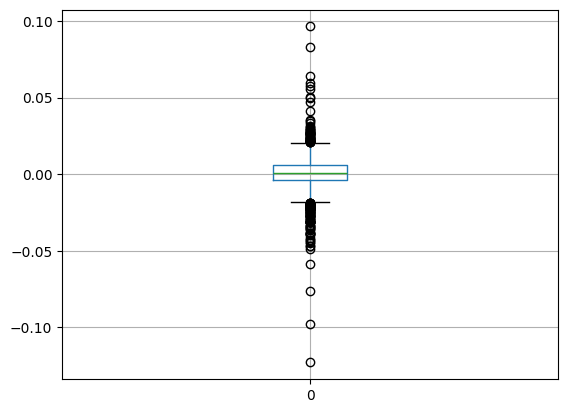

In [1887]:
pd.DataFrame(daily_SP_rets_series).boxplot()

In [1888]:
(test_statistic, p_value) = scipy.stats.jarque_bera(daily_SP_rets_series, nan_policy='raise')
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" %p_value)

JB test statistic = 15454.240346
p_value = 0.000000


In [1889]:
print(scipy.stats.skew(daily_SP_rets_series))
print(scipy.stats.kurtosis(daily_SP_rets_series))

-0.7258868019228486
14.333454002928264


In [1890]:
(test_statistic, p_value) = scipy.stats.shapiro(daily_SP_rets_series, nan_policy='raise')
print("Shapiro-Wilk test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

Shapiro-Wilk test statistic = 0.866400
p_value = 0.000000


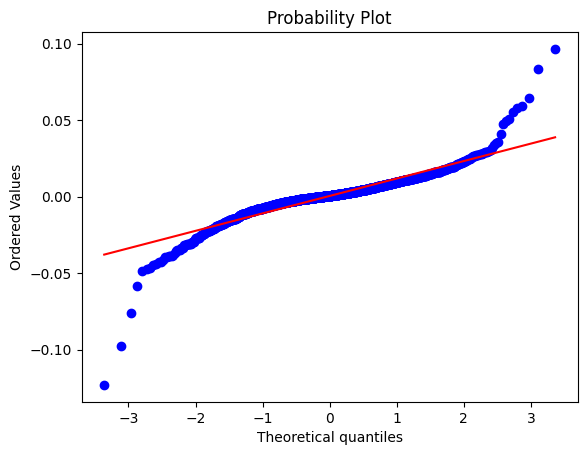

In [1891]:
scipy.stats.probplot(daily_SP_rets_series, dist="norm", plot=plt)
plt.show()

The daily log returns of the S&P 100 Index also has strong evidence to suggest that it is a dataset that is not normally distributed. The histogram almost shows a slight skew to the right and the p-value of the JB test is significantly less than 0.05 meaning that we can reject the Null hypothesis (that the skewness is 0 and the kurtosis is 3) at a 95% confidence. To further analyse this, we see that the skewness of the daily returns is almost -0.7 and the kurtosis is almost 14.3, suggesting that the dataset is skewed to the left and that the distribution is too peaked upwards. This can further be verified by the heavy-tailed skewness of the probability plot.

/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/2244773383.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_SP_100_prices = daily_SP_100_prices.resample('M').last()


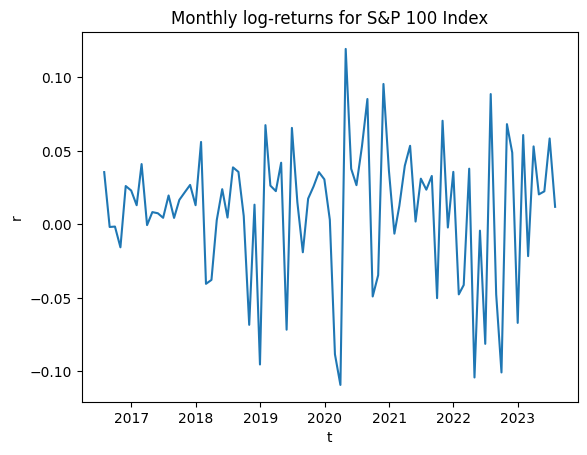

In [1892]:
monthly_SP_100_prices = daily_SP_100_prices.resample('M').last()
monthly_SP_rets_series = find_log_returns(monthly_SP_100_prices)
plt.plot(monthly_SP_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Monthly log-returns for S&P 100 Index')
plt.show()

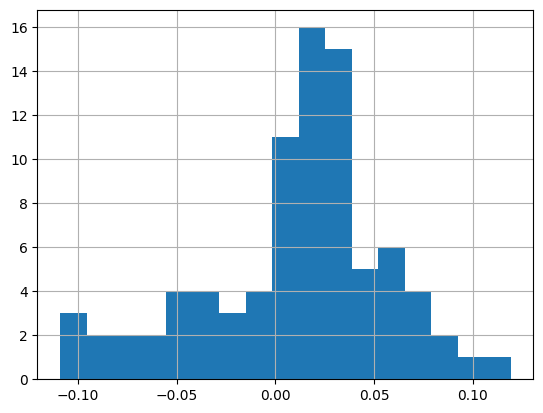

In [1893]:
monthly_SP_rets_series.hist(bins=17)
plt.show()

<Axes: >

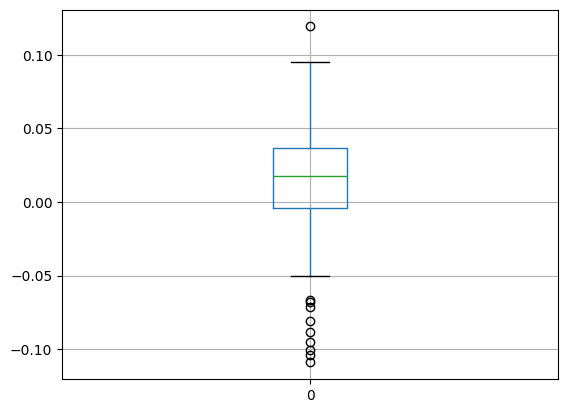

In [1894]:
pd.DataFrame(monthly_SP_rets_series).boxplot()

In [1895]:
(test_statistic, p_value) = scipy.stats.jarque_bera(monthly_SP_rets_series, nan_policy='raise')
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" %p_value)

JB test statistic = 5.876146
p_value = 0.052968


In [1896]:
print(scipy.stats.skew(monthly_SP_rets_series))
print(scipy.stats.kurtosis(monthly_SP_rets_series))

-0.6265951396200045
0.2977603620226308


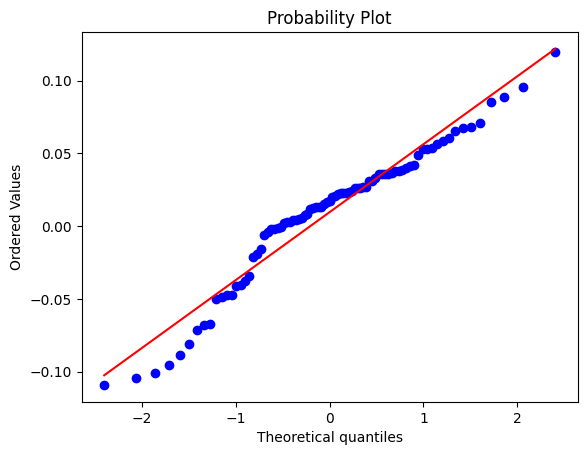

In [1897]:
scipy.stats.probplot(monthly_SP_rets_series, dist="norm", plot=plt)
plt.show()

The monthly log returns of the S&P 100 Index has weak evidence to suggest that it is a dataset that is normally distributed. We see that from the p-values gotten from both the JB test is just slighly greater than 0.05, indicating that we can just slighly accept the Null hypothesis (that the skewness is 0 and the kurtosis is 0 or 3) at a 95% confidence. Also, the probability curve doesn't show a strong deviation from normality, although some slight deviations are noticeable.

/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/1951238796.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_SP_100_prices = daily_SP_100_prices.resample('A').last()


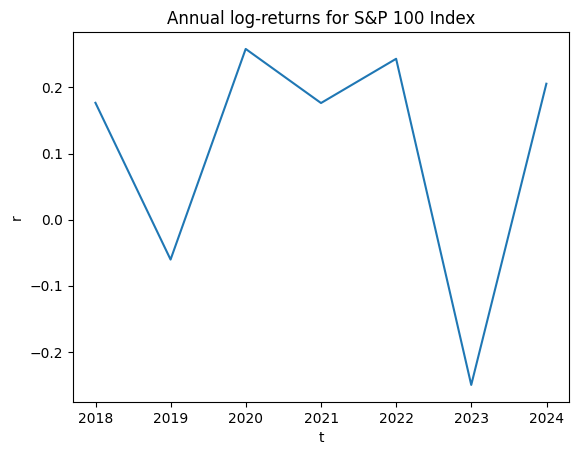

In [1898]:
annual_SP_100_prices = daily_SP_100_prices.resample('A').last()
annual_SP_rets_series = find_log_returns(annual_SP_100_prices)
plt.plot(annual_SP_rets_series)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Annual log-returns for S&P 100 Index')
plt.show()

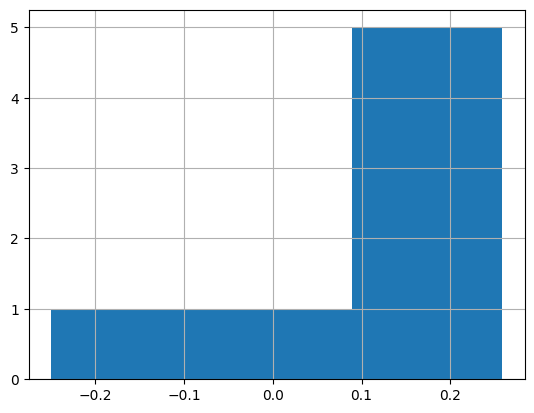

In [1899]:
annual_SP_rets_series.hist(bins=3)
plt.show()

<Axes: >

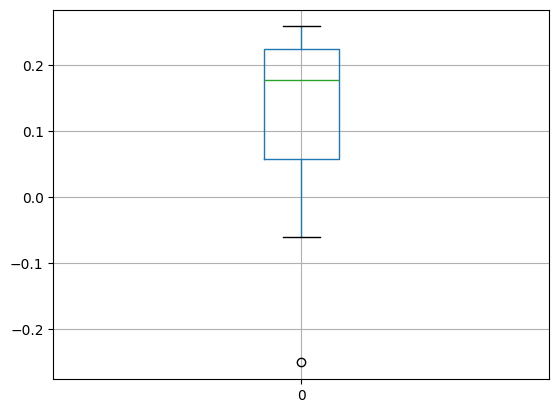

In [1900]:
pd.DataFrame(annual_SP_rets_series).boxplot()

In [1901]:
(test_statistic, p_value) = scipy.stats.jarque_bera(annual_SP_rets_series, nan_policy='raise')
print("JB test statistic = %f" % test_statistic)
print("p_value = %f" %p_value)

JB test statistic = 1.493433
p_value = 0.473920


In [1902]:
print(scipy.stats.skew(annual_SP_rets_series))
print(scipy.stats.kurtosis(annual_SP_rets_series))

-1.1215301345690019
-0.2983676311762635


In [1903]:
(test_statistic, p_value) = scipy.stats.shapiro(annual_SP_rets_series, nan_policy='raise')
print("Shapiro-Wilk test statistic = %f" % test_statistic)
print("p_value = %f" % p_value)

Shapiro-Wilk test statistic = 0.787862
p_value = 0.031005


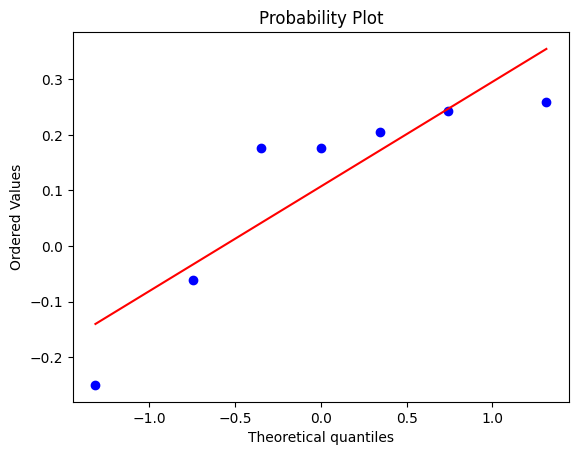

In [1904]:
scipy.stats.probplot(annual_SP_rets_series, dist="norm", plot=plt)
plt.show()

Just like the GOOG aanual log returns, he annual log returns of the S&P 100 has some evidence to suggest that it is a dataset that is normally distributed, although it is not conclusive as the sample size is quite small (a sample size of 7). Even though the histogram does not show a bell-shapped curve, this could be due to the low sample size, not accurately showing this on the histogram. However, we see that from the p-values gotten from both the JB test and the Shapiro-Wilk test are greater than 0.05, indicating that we can accept the Null hypothesis (that the skewness is 0 and the kurtosis is 0 or 3) at a 95% confidence. Also, the probability curve doesn't show a strong deviation from normality.

## Exercise 4

In [1905]:
index_and_stock_comparison_df = pd.DataFrame({'S&P Index monthly returns': np.exp(daily_SP_rets_series) - 1.})


for stock in prices.columns:
    if stock == 'Date':
        continue

    simple_returns = np.exp(np.diff(np.log(prices[stock]))) - 1.
    simple_returns_series = pd.Series(simple_returns, index=prices.index[1:])
    column_name = stock + ' monthly returns'

    index_and_stock_comparison_df = pd.concat([index_and_stock_comparison_df, pd.DataFrame({column_name: simple_returns_series})], axis=1)

    
index_and_stock_comparison_df 


,S&P Index monthly returns,AAPL monthly returns,VZ monthly returns,WBA monthly returns,WFC monthly returns,WMT monthly returns,XOM monthly returns,ABT monthly returns,ADBE monthly returns,AIG monthly returns,...,TMUS monthly returns,TSLA monthly returns,TXN monthly returns,UNH monthly returns,UNP monthly returns,UPS monthly returns,USB monthly returns,V monthly returns,ABBV monthly returns,ACN monthly returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-07,0.000354,0.004056,0.020509,0.005848,-0.004357,-0.000282,0.015335,-0.006127,-0.006053,-0.004015,...,0.015556,0.052837,0.004405,-0.008759,0.008290,0.007371,-0.005131,0.000745,0.004457,0.000418
2016-06-08,0.003261,-0.000909,-0.004444,0.004044,-0.005371,0.003520,0.000882,-0.000514,0.001624,-0.002454,...,0.003887,0.013687,0.008447,0.025266,0.016787,0.007894,0.003516,0.013027,-0.021712,-0.002758
2016-06-09,-0.001807,0.007176,0.008346,-0.005413,-0.017200,-0.002666,-0.001322,-0.001028,-0.006182,-0.014406,...,-0.018902,-0.026155,0.000966,0.001994,0.003931,0.002675,-0.006307,-0.004776,-0.015876,0.001006
2016-06-10,-0.007316,-0.008229,0.013859,0.043792,-0.016280,0.000703,-0.007610,-0.012092,-0.009993,-0.019786,...,-0.026695,-0.046085,-0.003701,-0.010236,-0.006824,-0.004287,-0.013634,-0.013291,0.004115,-0.009796
2016-06-13,-0.007877,-0.015076,-0.001899,0.022917,-0.007654,-0.008575,0.006779,-0.014063,-0.001339,-0.010729,...,0.003339,-0.004205,-0.006138,-0.008259,-0.000788,-0.008419,-0.006673,-0.022200,-0.017541,-0.010062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,-0.004670,-0.005891,-0.033127,-0.000344,-0.002798,-0.023041,0.002332,-0.007929,0.008269,0.010417,...,-0.001365,-0.007630,-0.006407,-0.016576,0.001531,0.002677,0.016672,-0.010173,-0.012750,-0.007176
2023-07-10,-0.001429,-0.010856,-0.021170,0.023711,-0.010521,0.009056,0.014831,0.006300,0.022833,-0.002062,...,-0.004533,-0.017564,0.033046,0.003185,0.010058,0.008734,0.005963,0.007232,-0.007454,0.008798
2023-07-11,0.005607,-0.002810,-0.004269,0.026183,0.009924,-0.001485,0.012227,0.004485,0.016903,0.011536,...,0.012144,0.000668,-0.003455,-0.000345,0.009421,0.021563,0.034973,0.010035,0.008030,0.004117


In [1906]:
rr = 0

def rename_func(x):
    x = x.split(' ')[0].lower()
    return x

excess_returns_df = index_and_stock_comparison_df - rr
excess_returns_df.rename(columns=rename_func, inplace=True)
excess_returns_df.rename(columns={'s&p': 'index'}, inplace=True)

excess_returns_df.head()


,index,aapl,vz,wba,wfc,wmt,xom,abt,adbe,aig,...,tmus,tsla,txn,unh,unp,ups,usb,v,abbv,acn
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-07,0.000354,0.004056,0.020509,0.005848,-0.004357,-0.000282,0.015335,-0.006127,-0.006053,-0.004015,...,0.015556,0.052837,0.004405,-0.008759,0.008290,0.007371,-0.005131,0.000745,0.004457,0.000418
2016-06-08,0.003261,-0.000909,-0.004444,0.004044,-0.005371,0.003520,0.000882,-0.000514,0.001624,-0.002454,...,0.003887,0.013687,0.008447,0.025266,0.016787,0.007894,0.003516,0.013027,-0.021712,-0.002758
2016-06-09,-0.001807,0.007176,0.008346,-0.005413,-0.017200,-0.002666,-0.001322,-0.001028,-0.006182,-0.014406,...,-0.018902,-0.026155,0.000966,0.001994,0.003931,0.002675,-0.006307,-0.004776,-0.015876,0.001006
2016-06-10,-0.007316,-0.008229,0.013859,0.043792,-0.016280,0.000703,-0.007610,-0.012092,-0.009993,-0.019786,...,-0.026695,-0.046085,-0.003701,-0.010236,-0.006824,-0.004287,-0.013634,-0.013291,0.004115,-0.009796
2016-06-13,-0.007877,-0.015076,-0.001899,0.022917,-0.007654,-0.008575,0.006779,-0.014063,-0.001339,-0.010729,...,0.003339,-0.004205,-0.006138,-0.008259,-0.000788,-0.008419,-0.006673,-0.022200,-0.017541,-0.010062


/var/folders/9y/pjl381bj33qg4q5hcl7lwdzr0000gn/T/ipykernel_1213/1648562828.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  alpha_and_beta_comparison_df = pd.concat([alpha_and_beta_comparison_df, pd.DataFrame({'Stock': stock, 'Parameter': 'alpha', 'Value': result.params['Intercept']}, index=[0])], axis=0)


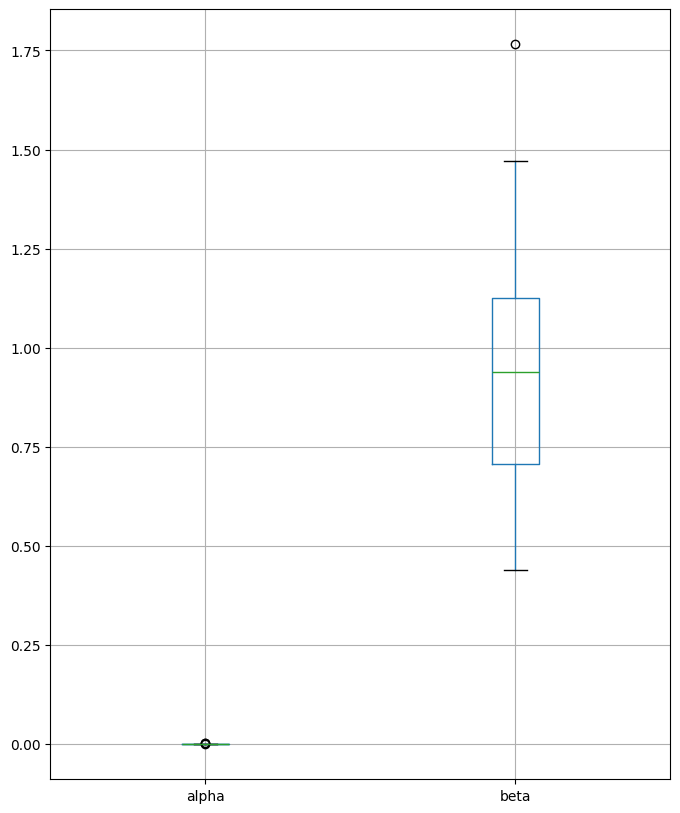

In [1907]:
import statsmodels.formula.api as sm

alpha_and_beta_comparison_df = pd.DataFrame(columns=['Stock', 'Parameter', 'Value'])

#Similar to exercise 2, but with the parameters (alpha and beta), instead of the frequencies
for stock in excess_returns_df.columns:
    if stock == 'index':
        continue

    result = sm.ols(formula = stock + ' ~ index', data=excess_returns_df).fit()

    alpha_and_beta_comparison_df = pd.concat([alpha_and_beta_comparison_df, pd.DataFrame({'Stock': stock, 'Parameter': 'alpha', 'Value': result.params['Intercept']}, index=[0])], axis=0)
    alpha_and_beta_comparison_df = pd.concat([alpha_and_beta_comparison_df, pd.DataFrame({'Stock': stock, 'Parameter': 'beta', 'Value': result.params['index']}, index=[0])], axis=0)

    
alpha_and_beta_pivot_table = alpha_and_beta_comparison_df.pivot(index='Stock', columns='Parameter', values='Value')

plt.figure(figsize=(8, 10))
alpha_and_beta_pivot_table.boxplot()
plt.show()


## Exercise 5

In [1908]:
excess_returns_df.cov()

,index,aapl,vz,wba,wfc,wmt,xom,abt,adbe,aig,...,tmus,tsla,txn,unh,unp,ups,usb,v,abbv,acn
index,0.000149,0.000187,0.000065,0.000117,0.000165,0.000076,0.000124,0.000127,0.000196,0.000166,...,0.000117,0.000219,0.000172,0.000128,0.000135,0.000127,0.000151,0.000158,0.000098,0.000160
aapl,0.000187,0.000356,0.000058,0.000124,0.000150,0.000089,0.000116,0.000149,0.000263,0.000156,...,0.000138,0.000318,0.000220,0.000143,0.000146,0.000146,0.000136,0.000191,0.000098,0.000186
vz,0.000065,0.000058,0.000150,0.000083,0.000087,0.000058,0.000073,0.000068,0.000048,0.000084,...,0.000083,0.000033,0.000063,0.000076,0.000066,0.000061,0.000090,0.000064,0.000058,0.000072
wba,0.000117,0.000124,0.000083,0.000366,0.000174,0.000098,0.000132,0.000109,0.000114,0.000165,...,0.000087,0.000115,0.000134,0.000117,0.000116,0.000125,0.000178,0.000114,0.000094,0.000123
wfc,0.000165,0.000150,0.000087,0.000174,0.000455,0.000072,0.000227,0.000119,0.000140,0.000331,...,0.000123,0.000189,0.000180,0.000151,0.000190,0.000156,0.000340,0.000183,0.000117,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ups,0.000127,0.000146,0.000061,0.000125,0.000156,0.000079,0.000113,0.000111,0.000163,0.000140,...,0.000097,0.000139,0.000157,0.000105,0.000142,0.000291,0.000148,0.000129,0.000084,0.000140
usb,0.000151,0.000136,0.000090,0.000178,0.000340,0.000061,0.000209,0.000115,0.000134,0.000321,...,0.000114,0.000155,0.000164,0.000134,0.000183,0.000148,0.000388,0.000174,0.000109,0.000174
v,0.000158,0.000191,0.000064,0.000114,0.000183,0.000065,0.000144,0.000138,0.000220,0.000195,...,0.000132,0.000221,0.000182,0.000140,0.000151,0.000129,0.000174,0.000270,0.000109,0.000184
abbv,0.000098,0.000098,0.000058,0.000094,0.000117,0.000057,0.000095,0.000119,0.000110,0.000122,...,0.000086,0.000097,0.000105,0.000125,0.000093,0.000084,0.000109,0.000109,0.000278,0.000106


In [1909]:
excess_returns_stocks_df = excess_returns_df.iloc[:, 1:]
cov_matrix = excess_returns_stocks_df.cov()
cov_matrix

,aapl,vz,wba,wfc,wmt,xom,abt,adbe,aig,amgn,...,tmus,tsla,txn,unh,unp,ups,usb,v,abbv,acn
aapl,0.000356,0.000058,0.000124,0.000150,0.000089,0.000116,0.000149,0.000263,0.000156,0.000120,...,0.000138,0.000318,0.000220,0.000143,0.000146,0.000146,0.000136,0.000191,0.000098,0.000186
vz,0.000058,0.000150,0.000083,0.000087,0.000058,0.000073,0.000068,0.000048,0.000084,0.000066,...,0.000083,0.000033,0.000063,0.000076,0.000066,0.000061,0.000090,0.000064,0.000058,0.000072
wba,0.000124,0.000083,0.000366,0.000174,0.000098,0.000132,0.000109,0.000114,0.000165,0.000113,...,0.000087,0.000115,0.000134,0.000117,0.000116,0.000125,0.000178,0.000114,0.000094,0.000123
wfc,0.000150,0.000087,0.000174,0.000455,0.000072,0.000227,0.000119,0.000140,0.000331,0.000110,...,0.000123,0.000189,0.000180,0.000151,0.000190,0.000156,0.000340,0.000183,0.000117,0.000179
wmt,0.000089,0.000058,0.000098,0.000072,0.000185,0.000053,0.000074,0.000091,0.000053,0.000073,...,0.000069,0.000076,0.000085,0.000075,0.000060,0.000079,0.000061,0.000065,0.000057,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ups,0.000146,0.000061,0.000125,0.000156,0.000079,0.000113,0.000111,0.000163,0.000140,0.000094,...,0.000097,0.000139,0.000157,0.000105,0.000142,0.000291,0.000148,0.000129,0.000084,0.000140
usb,0.000136,0.000090,0.000178,0.000340,0.000061,0.000209,0.000115,0.000134,0.000321,0.000102,...,0.000114,0.000155,0.000164,0.000134,0.000183,0.000148,0.000388,0.000174,0.000109,0.000174
v,0.000191,0.000064,0.000114,0.000183,0.000065,0.000144,0.000138,0.000220,0.000195,0.000106,...,0.000132,0.000221,0.000182,0.000140,0.000151,0.000129,0.000174,0.000270,0.000109,0.000184
abbv,0.000098,0.000058,0.000094,0.000117,0.000057,0.000095,0.000119,0.000110,0.000122,0.000127,...,0.000086,0.000097,0.000105,0.000125,0.000093,0.000084,0.000109,0.000109,0.000278,0.000106


In [1910]:
#The two lines below just cleans up the data to a point where a dtot product can be performed
beta_comparison_df = alpha_and_beta_comparison_df.loc[alpha_and_beta_comparison_df['Parameter'] == 'beta'].copy()
beta_product_matrix = beta_comparison_df[['Stock', 'Value']].set_index('Stock').copy()
#The dataframe is considered as a '1d' matrix that dot products itself to give the '2d' symmetrical matrix that shows the product of the beta values for every stock pair
beta_product_matrix = beta_product_matrix.dot(beta_product_matrix.T)
beta_product_matrix


Stock,aapl,vz,wba,wfc,wmt,xom,abt,adbe,aig,amgn,...,tmus,tsla,txn,unh,unp,ups,usb,v,abbv,acn
Stock,,,,,,,,,,,,,,,,,,,,,
aapl,1.573889,0.549149,0.986559,1.390129,0.641263,1.045848,1.065641,1.653361,1.399948,0.875373,...,0.985387,1.846399,1.445694,1.075456,1.136013,1.066226,1.266865,1.328121,0.822341,1.343326
vz,0.549149,0.191605,0.344222,0.485033,0.223744,0.364909,0.371815,0.576878,0.488459,0.305428,...,0.343813,0.644231,0.504420,0.375240,0.396369,0.372019,0.442024,0.463397,0.286925,0.468703
wba,0.986559,0.344222,0.618404,0.871373,0.401962,0.655568,0.667975,1.036375,0.877528,0.548709,...,0.617669,1.157377,0.906203,0.674127,0.712086,0.668341,0.794108,0.832505,0.515467,0.842036
wfc,1.390129,0.485033,0.871373,1.227823,0.566392,0.923740,0.941222,1.460322,1.236496,0.773169,...,0.870337,1.630822,1.276901,0.949891,1.003377,0.941738,1.118952,1.173056,0.726328,1.186485
wmt,0.641263,0.223744,0.401962,0.566392,0.261275,0.426119,0.434183,0.673643,0.570393,0.356661,...,0.401484,0.752294,0.589032,0.438182,0.462855,0.434421,0.516170,0.541128,0.335053,0.547323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ups,1.066226,0.372019,0.668341,0.941738,0.434421,0.708506,0.721915,1.120064,0.948390,0.593019,...,0.667547,1.250837,0.979381,0.728564,0.769588,0.722311,0.858233,0.899731,0.557092,0.910032
usb,1.266865,0.442024,0.794108,1.118952,0.516170,0.841831,0.857763,1.330835,1.126855,0.704611,...,0.793164,1.486216,1.163678,0.865663,0.914407,0.858233,1.019733,1.069040,0.661924,1.081279
v,1.328121,0.463397,0.832505,1.173056,0.541128,0.882536,0.899238,1.395184,1.181341,0.738681,...,0.831515,1.558078,1.219944,0.907520,0.958621,0.899731,1.069040,1.120731,0.693930,1.133561


In [1911]:
xdata = np.array([])
ydata = np.array([])

#Forming a one dimensional x and y
for i, column in enumerate(beta_product_matrix):
    ydata = np.concatenate( (ydata, cov_matrix.values[:,i] - rr))
    xdata = np.concatenate( (xdata, beta_product_matrix.values[:,i] - rr))
    


In [1912]:
regression_result = (beta, alpha, rvalue, pvalue, stderr) = scipy.stats.linregress(x=xdata, y=ydata)
print(regression_result)

LinregressResult(slope=np.float64(0.00015086436564102848), intercept=np.float64(9.386771672710467e-06), rvalue=np.float64(0.757117870810552), pvalue=np.float64(0.0), stderr=np.float64(1.3284357406103278e-06), intercept_stderr=np.float64(1.2481879158044226e-06))


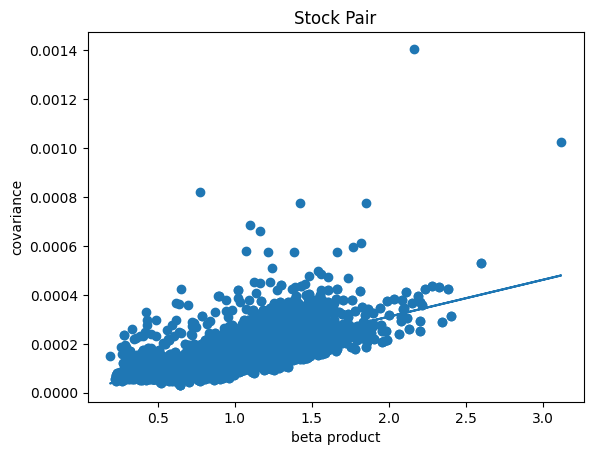

In [1913]:
plt.scatter(x=xdata, y=ydata)
plt.plot(xdata, alpha + beta * xdata)
plt.xlabel('beta product')
plt.ylabel('covariance')
plt.title('Stock Pair')
plt.show()

The result seen above is the linear regression between the covariance of the stock pair and the product of the beta of each stock pair. We see an r-value of 0.75 that shows a strong positive correlation between the covariance and the product of the beta values between the stock pairs, and we see a p-value of 0.0 (less than 0.05) which indicates that we can strongly reject the null hypothesis at a 95% confidence level that states that there is no linear relationship between the two variables (in other words, indicating statistically significant relationship). Therefore, this verifies what was stated about the single-index model.
 However, as the product of the beta values lead to a very small float, there could be loss in precision of the numbers due to the floating-point errors introduced.

In [ ]:
def foldl(f, data, z):
    if (len(data) == 0):
        print(z)
        return z
    else:
        head = data[0]
        tail = data[1:]
        print("Folding", head, "with", tail, "using", z)
        partial_result = f(z, head)
        print("Partial result is", partial_result)
        return foldl(f, tail, partial_result)  
    


def foldr(f, data, z):
    if (len(data) == 0):
        return z
    else:
        print(data[0])
        print(data[1:])
        print(z)
        print()
        return f(data[0], foldr(f, data[1:], z))    
    

foldr(lambda x, y: x - y, [1, 2, 3, 4, 5], 0)




1
[2, 3, 4, 5]
0

2
[3, 4, 5]
0

3
[4, 5]
0

4
[5]
0

5
[]
0

4


In [ ]:
from numpy import sqrt, exp, cumsum, sum, maximum, mean
from numpy.random import standard_normal
import numpy as np

# Parameters
S0 = 100.; T = 1.0; K = 50; r = 0.02; sigma = 0.1
M = 200; dt = T / M; I = 100000



# Simulate I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * 
                          standard_normal((M, I)), axis=0))

S
#payoff = max(mean(S, axis=0)[-1] - K, 0)
#payoff

# Calculate the Monte Carlo estimator
##C0 = exp(-r * T) * mean(payoff)
#print("Estimated present value is %f" % C0)

array([[ 99.72404886,  99.79289169, 100.83803543, ...,  98.98350065,
        100.55682369,  99.41504062],
       [100.14432727, 100.52534229, 100.87563011, ...,  98.53023312,
        100.2749055 ,  97.43681031],
       [100.98195756, 100.40847167, 100.2312172 , ...,  99.46707577,
        100.05576846,  97.2266278 ],
       ...,
       [111.47270648, 118.3676007 , 102.96217321, ..., 107.28475554,
         94.53918832, 102.19454369],
       [110.39043411, 118.56787686, 103.4814079 , ..., 106.8193621 ,
         94.79022371, 103.14123959],
       [110.88028142, 119.17950039, 103.60746252, ..., 106.64533625,
         94.40911392, 103.22251226]])

In [48]:
S[:, 1]

array([ 99.79289169, 100.52534229, 100.40847167, 100.19682447,
        98.8098762 ,  97.43423547,  97.48863141,  96.95864142,
        98.37380919,  97.52572383,  97.21174205,  97.85475849,
        98.40210717,  98.69873599,  98.09960787,  98.85840543,
        99.45171289,  99.12716593, 100.90493269, 101.93126786,
       103.05536542, 102.50291362, 102.93250387, 103.05670859,
       103.06915135, 101.62401781, 102.28314921, 102.66356247,
       101.8044843 , 101.26008125, 101.87390949, 101.07364376,
       101.38360256, 101.95491961, 101.52320405, 101.95510964,
       102.65957897, 100.3044033 , 101.00517496, 101.72057883,
       101.75052683, 102.76149999, 101.48926897, 102.55252679,
       102.33471023, 102.68199526, 104.22424722, 105.04834153,
       106.0024864 , 106.20806859, 106.3971037 , 106.1342936 ,
       105.66607013, 106.35432549, 107.36836182, 108.42870811,
       107.29992865, 107.82571008, 107.56638073, 109.58191043,
       109.76492562, 110.48784315, 110.18395108, 109.75